Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

Read Data

In [2]:
stock_Apple = pd.read_csv('../Dataset/Apple_clean.csv')
stock_Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.326138,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.424604,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.435713,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.333343,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.321635,477131200
...,...,...,...,...,...,...,...
3977,2025-10-23,259.940002,260.619995,258.010010,259.579987,259.579987,32754900
3978,2025-10-24,261.190002,264.130005,259.179993,262.820007,262.820007,38253700
3979,2025-10-27,264.880005,269.119995,264.649994,268.809998,268.809998,44888200
3980,2025-10-28,268.989990,269.890015,268.149994,269.000000,269.000000,41461500


Analyse

Describe

In [3]:
stock_Apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3.982000e+03
mean,77.674935,78.510450,76.892210,77.739837,75.444194,2.208990e+08
std,72.229669,73.020218,71.516943,72.313868,72.654342,2.158672e+08
min,6.870357,7.000000,6.794643,6.858929,5.765364,1.809042e+07
25%,21.298661,21.492053,21.061875,21.267947,18.149110,7.928055e+07
50%,40.127501,40.687500,39.812500,40.251249,37.645607,1.328234e+08
75%,143.394993,145.054996,141.685001,143.364998,140.989105,2.936136e+08
max,269.274994,271.410004,268.149994,269.000000,269.000000,1.880998e+09


In [4]:
CV = stock_Apple['Close'].std() / stock_Apple['Close'].mean()
print("Coefficient of Variation: ", CV)


Coefficient of Variation:  0.9302034944132261


In [5]:
# Skewness
skewness = stats.skew(stock_Apple['Close'])
print("Skewness: ", skewness)

Skewness:  0.891467592635785


In [6]:
# Kurtosis
kurtosis = stats.kurtosis(stock_Apple['Close'])
print("Kurtosis: ", kurtosis)

Kurtosis:  -0.6602134006818545



Visualization

Initial Close Values

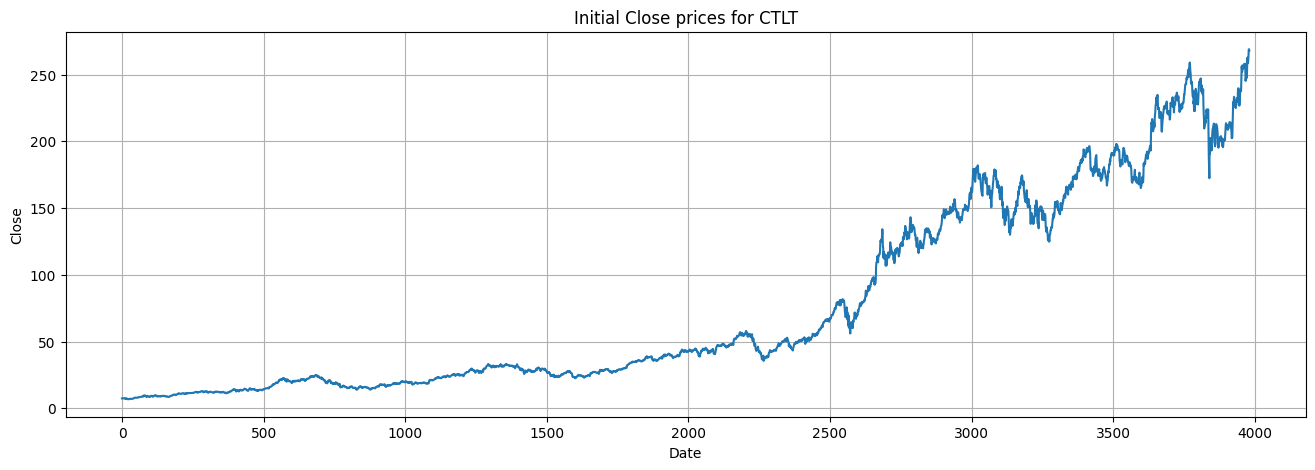

In [ ]:
plt.figure(figsize=(16,5))

plt.plot(stock_Apple.index, stock_Apple['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for Apple stock')
plt.grid()
plt.show()

Histogram

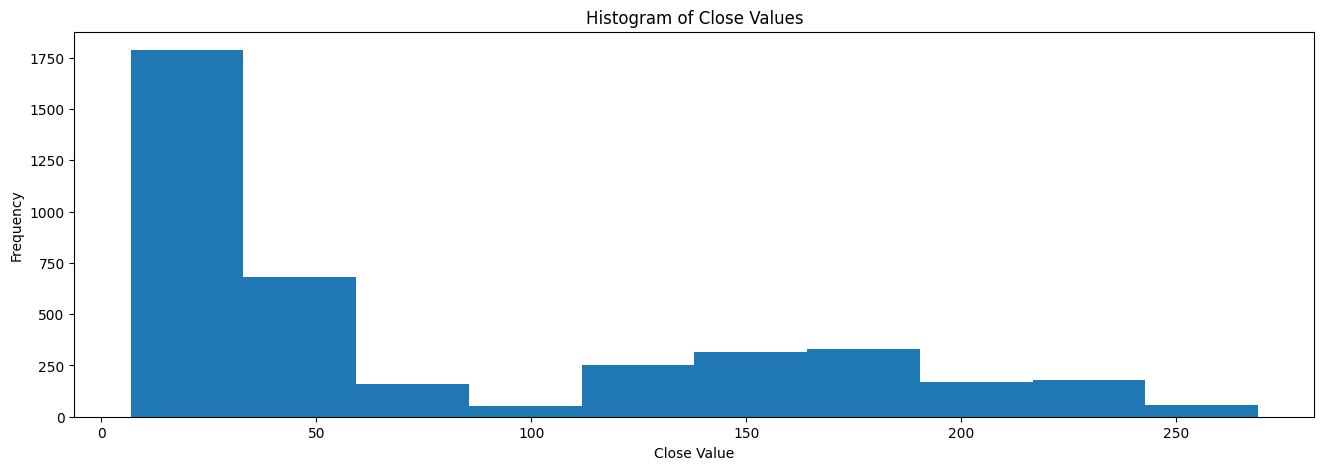

In [8]:
plt.figure(figsize=(16,5))
plt.hist(stock_Apple['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

Boxplot

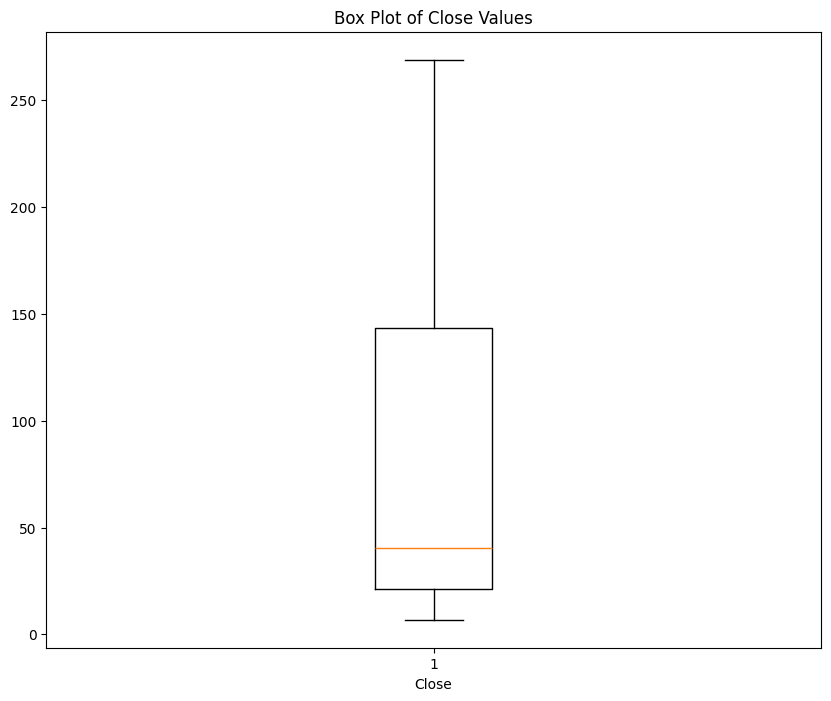

In [9]:
plt.figure(figsize=(10,8))
plt.boxplot(stock_Apple['Close'])
plt.title("Box Plot of Close Values")
plt.xlabel("Close")
plt.show()

Visualizing the components of our time series: Trend, Seasonality, and Noise

In [10]:
# Convert the 'Date' column to datetime format
stock_Apple['Date'] = pd.to_datetime(stock_Apple['Date'])

# Set the 'Date' column as the index value
stock_Apple = stock_Apple.set_index(pd.DatetimeIndex(stock_Apple['Date'].values))

# Delete Date from Dataframe
stock_Apple = stock_Apple.drop('Date', axis=1)

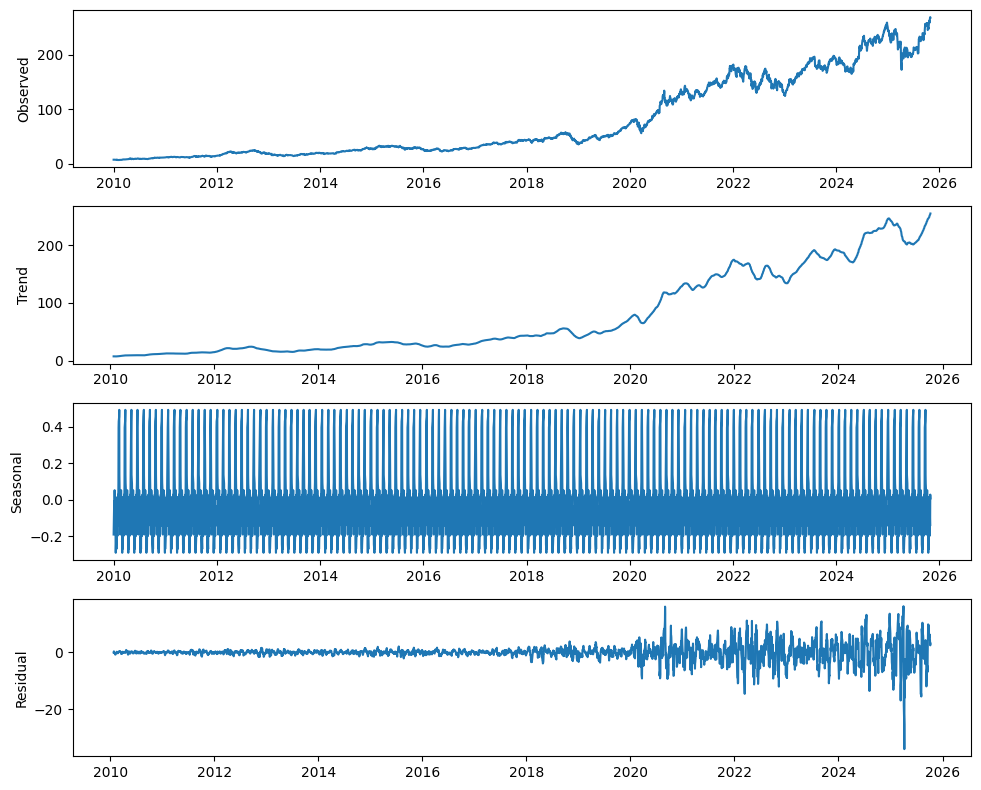

In [11]:
decomposition = sm.tsa.seasonal_decompose(stock_Apple['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()